In [ ]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['figure.figsize'] = (8,5)
plt.style.use('fivethirtyeight')

In [ ]:
# some data for today's class
data = bpd.read_csv('data/census.csv').get(['SEX', 'AGE', 'POPESTIMATE2015'])
cleaned_data = data[data.get('AGE') != 999]
males = cleaned_data[cleaned_data.get('SEX') == 1].drop(columns='SEX').set_index('AGE')
females = cleaned_data[cleaned_data.get('SEX') == 2].drop(columns='SEX').set_index('AGE')

population = bpd.DataFrame().assign(
    Males=males.get('POPESTIMATE2015'),
    Females=females.get('POPESTIMATE2015')
)

# Lecture 8 

## Histograms and Overlaid Plots

# Bar Charts

## Data set of top 200 movies, by gross earnings

In [ ]:
#: read in the csv
top_movies = bpd.read_csv('data/top_movies.csv').set_index('Title')
top_movies

### Discussion question

Suppose we run this code. What do we get?

- A) A bar for each movie. Its height is the age of the movie.
- B) A bar for each age. Its height is the # of movies of that age.
- C) A bar for each age. Its height is the number of studios which produced movies of that age.

In [ ]:
(
    top_movies.assign( Age=2021 - top_movies.get('Year'))
    .groupby('Age').count()
    .plot(kind='bar', y='Studio', figsize=[15,5])
)

## Star Wars

- Which Star Wars movie was most successful by adjusted gross?
- How do we select all rows whose label contains "Star Wars"?

In [ ]:
top_movies

###  Answer: Use the Series method `.str.contains()`

In [ ]:
top_movies.index.str.contains('Star Wars')

## Also works on columns:

In [ ]:
top_movies[top_movies.get('Studio').str.contains('Disney')]

## Which Star Wars movie was most successful?

In [ ]:
(
    top_movies[top_movies.index.str.contains('Star Wars')]
    .sort_values(by='Gross (Adjusted)')
    .plot(kind='barh', y='Gross (Adjusted)')
)

# Histograms

### Visualizing distributions of numerical values

## Distribution of adjusted gross


- $x$ axis: adjusted gross (numerical)
- $y$ axis: a bar whose height encodes how many movies made about that much money
- group by adjusted gross with count?

<img src="data/histo.png"/>


In [ ]:
top_movies.groupby('Gross (Adjusted)').count()

## Plotting Histograms

- Call `.plot(kind='hist', y=column_name)`.
- Automatically places numbers into *bins*.
- Height of bar is *number* of values in corresponding *bin*.
- Optional: specify number of bins with `bins=`.

In [ ]:
top_movies.plot(kind='hist', y='Gross (Adjusted)', bins=20)

## Distribution of movies released by year

In [ ]:
top_movies.plot(kind='hist', y='Year', bins=20)

## Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Bins are defined by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin

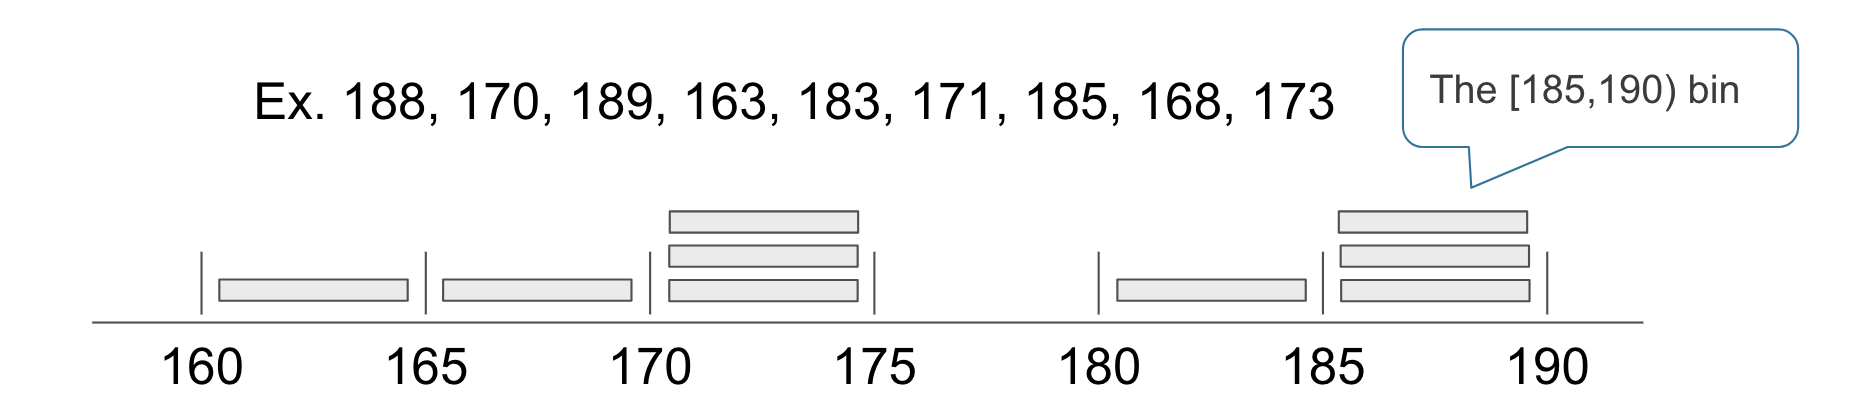    

## Custom Bins

- Can specify your own bins with a list.
- `bins=[1900, 1970, 1980, 1995, 2015]` creates bins: [1900, 1970), [1970, 1980), [1980, 1995), [1995, 2015]
- Note: last bin is inclusive!
- **Warning**: Data points not in any bin are not counted.

<center>
<img src="./data/bins.png"/>
</center>

In [ ]:
decade_bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
top_movies.plot(kind='hist', y='Year', bins=decade_bins)

### Discussion Question

Intuitively, what should happen to our histogram if we combine the two bins [1940, 1950) and [1950, 1960) into one large bin [1940, 1960)?

Option | Answer
--- | ---
A. | The height of the bar for bin [1940, 1960) should be the sum of the heights of the bars for bins [1940, 1950) and [1950, 1960).
A. | The height of the bar for bin [1940, 1960) should be the average of the heights of the bars for bins [1940, 1950) and [1950, 1960).
C. | The area of the bar for bin [1940, 1960) should be the sum of the areas of the bars for bins [1940, 1950) and [1950, 1960).
D. | More than one of the above.


## A Problem

- It looks like a lot of movies were released every year between 1940 and 1960.
- But it's just because the bin is extra big.
- Actually: low number of movies released per year.

In [ ]:
combined_decade_bins = [1920, 1930, 1940, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
top_movies.get('Year').plot(kind='hist', bins=combined_decade_bins)

## Fix: Normalize bar by it's width

- Use the `density=True` keyword argument to make a *density histogram*.

In [ ]:
combined_decade_bins = [1920, 1930, 1940, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
top_movies.get('Year').plot(kind='hist', bins=combined_decade_bins, density=True)

## Key Fact about Density Histograms

The **area** of a bar in a density histogram is:

- equal to the % of all data points that fall into that bin.
- equivalently, the probability that a data point, selected at random, falls into that bin.

In [ ]:
combined_decade_bins = [1920, 1930, 1940, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
top_movies.get('Year').plot(kind='hist', bins=combined_decade_bins, density=True)

### How to calculate height in density histogram

- $\text{Area} = \text{Height} * \text{Width}$
- So $\text{Height} = \text{Area} / \text{Width} = \text{Percent} / \text{Width}$

In [ ]:
top_movies[(top_movies.get('Year')>=1940)&(top_movies.get('Year')<1960)].shape[0]

**Example**: The $[1940, 1960)$ bin contains 20 out of 200 movies.
* So area is $20/200 = 10\%$
* The bin is $1960 - 1940 = 20$ years wide.

$$ \rm{Height\ of\ bar} = \frac{\rm{Area}}{\rm{Width}} = \frac{10 \%}{20\rm{\ years}} = 0.5\%\rm{\ per\ year}$$

## Important

In this class, "histogram" means "density histogram".

## Bar Charts vs. Histograms

Bar Chart | Histogram
---|---
1 categorical axis & 1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, widths and spacing | Horizontal axis is numerical and to scale
For distributions, height of bars are proportional to the percent of individuals | Height measures density; areas are proportional to the percent of individuals

# Overlaying plots

## Census Data

Downloaded from `census.gov`

In [ ]:
population

## Recall: line plots


In [ ]:
population.plot(kind='line', y='Females')

In [ ]:
population.plot(kind='line', y='Males')

## Overlaying Plots

- If `y=column_name` is omitted, all columns are plotted!

In [ ]:
population.plot(kind='line')

## Interesting

- There are *many* more women than men in old age.

In [ ]:
(population.get('Females') / population.get('Males')).plot(kind='line')
plt.ylabel('Ratio of Women to Men')

### To plot multiple graphs at once:
* Drop all extraneous columns from your table.
* Specify the column for the x-axis (if not the index) in `.plot(x=column_name)`
* `plot` will plot **all** other columns on a shared y-axis.

Same thing works for `barh`, `bar`, `hist`, but not `scatter`.

# Overlaid Histograms

## Mother/Father/Child height data

- One row for each child
- Only need `father`, `mother`, and `childHeight` columns for now

In [ ]:
heights = bpd.read_csv('data/galton.csv')
heights

## `.get([column_1, ..., column_k])`

- Passing a list of column labels to `.get()` returns a DataFrame

In [ ]:
heights = heights.get(['father', 'mother', 'childHeight'])
heights

## Plot overlayed histograms

- Try `alpha=.65` to get see-through bars.

In [ ]:
heights.plot(kind='hist', alpha=0.65, bins=20)

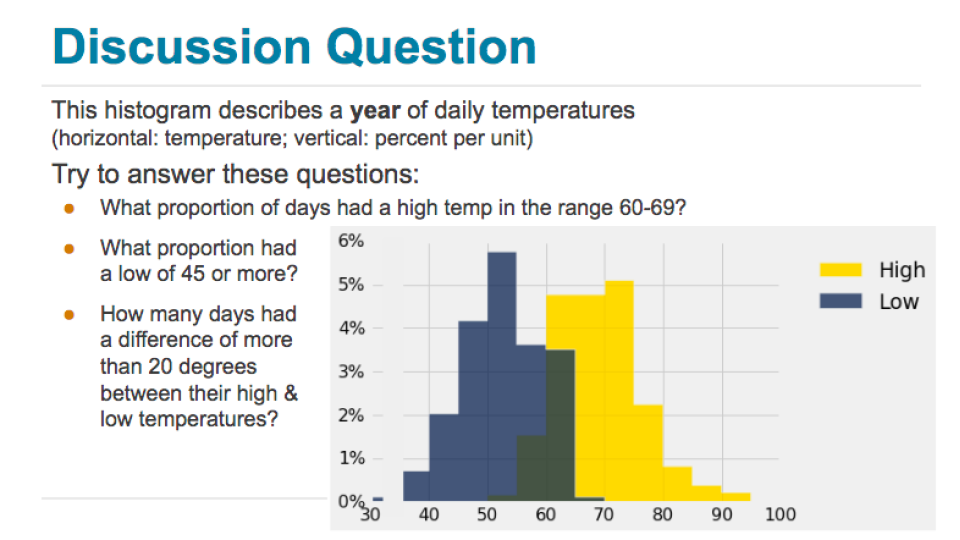